# Introduction

## Project - HR

Predict the Baseball major league player salary based on career and previous season statistics

Project Steps Followed

1. Define Project Goals/Objective
2. Data Retrieval
3. Data Cleansing
4. Exploratory Data Analysis
5. Data Modeling
6. Result Analysis

## Define Research Goals

Predict the Baseball major league player salary based on career and previous season statistics

## Data Set

We have career statistics and previous year statistics for 322 players

By the end of the project, the learners will be able to learn the approaches required for Ridge Regression, Lasso Regression, and PCA

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn import model_selection

In [8]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.preprocessing import StandardScaler

## Load the Data

In [11]:
playerdf = pd.read_csv('Player.csv', index_col=0)

In [12]:
playerdf.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Data Analysis

### Dimension of the Data

In [13]:
playerdf.shape 

(322, 20)

We get the dimension of the dataset. The dataset has 322 rows and 20 columns

## Data Types

In [14]:
playerdf.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

## Null Values

In [15]:
playerdf.isnull().sum() 

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

## Drop Null Values 

In [16]:
playerdf.dropna(inplace=True)

In [17]:
playerdf.shape  

(263, 20)

## Statistical Analysis and Encode Variables

### Statistical Data Analysis

In [18]:
playerdf.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


## Categorical Variable Analysis

In [19]:
playerdf.League.value_counts()

League
A    139
N    124
Name: count, dtype: int64

In [20]:
playerdf.Division.value_counts()

Division
W    134
E    129
Name: count, dtype: int64

In [21]:
playerdf.NewLeague.value_counts()

NewLeague
A    141
N    122
Name: count, dtype: int64

## Encode Categorical Variables

In [22]:
dummyCol = pd.get_dummies(playerdf[['League', 'Division', 'NewLeague']]) 

dummyCol.head(3)

In [23]:
dummyCol.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    bool 
 1   League_N     263 non-null    bool 
 2   Division_E   263 non-null    bool 
 3   Division_W   263 non-null    bool 
 4   NewLeague_A  263 non-null    bool 
 5   NewLeague_N  263 non-null    bool 
dtypes: bool(6)
memory usage: 3.6+ KB


## Prepare Input/Output Variables

### Prepare Input Variables (X)

In [24]:
 XTemp = playerdf.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)

In [25]:
X = pd.concat([XTemp, dummyCol[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    bool 
 17  Division_W   263 non-null    bool 
 18  NewLeague_N  263 non-null    bool 
dtypes: bool(3), int64(16)
memory usage

## Prepare Output Variable

In [27]:
y = playerdf.Salary

In [28]:
y.head()

-Alan Ashby          475.0
-Alvin Davis         480.0
-Andre Dawson        500.0
-Andres Galarraga     91.5
-Alfredo Griffin     750.0
Name: Salary, dtype: float64

## Ridge Regression

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.00001

In [30]:
ridge = Ridge()

In [31]:
coeffs = []

In [32]:
scaler = StandardScaler()

In [33]:
for a in alphas:
    ridge.set_params(alpha=a) 
    ridge.fit(scaler.fit_transform(X), y) 
    coeffs.append(ridge.coef_)

In [34]:
np.shape(coeffs)

(100, 19)

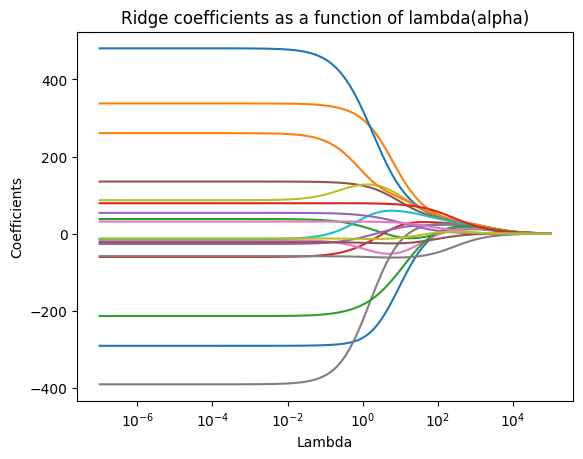

In [37]:
ax= plt.gca()
ax.plot(alphas, coeffs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Ridge coefficients as a function of lambda(alpha)')
plt.show()  

In [41]:
 # pd.set_option('precision',6)

In [42]:
X_train, X_test , y_train, y_test = model_selection.train_test_split(X,y,test_size=0.5, random_state=1)               

In [43]:
def Ridge_Regression(alpha):
    scaler = StandardScaler() 
    ridge = Ridge(alpha=alpha)
    ridge.fit(scaler.fit_transform(X_train), y_train) 
    pred = ridge.predict(scaler.fit_transform(X_test))
    print(pd.Series(ridge.coef_, index=X.columns)) 
    print('Mean Squared Error: ',mean_squared_error(y_test, pred)) 

## Ridge Regression lambda = 0

In [44]:
Ridge_Regression(0)

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64
Mean Squared Error:  117301.05503374818


## Ridge Regression lambda = 4

In [45]:
Ridge_Regression(4)

AtBat         -210.807322
Hits           193.076932
HmRun          -51.437368
Runs             1.624070
RBI             81.458917
Walks           94.582539
Years          -28.029476
CAtBat        -117.924364
CHits           91.159632
CHmRun          91.762010
CRuns          101.115450
CRBI           117.598963
CWalks         -38.434685
PutOuts        125.556071
Assists         25.559188
Errors         -18.518904
League_N        35.792050
Division_W     -60.245442
NewLeague_N    -18.650623
dtype: float64
Mean Squared Error:  104835.06228323367


## Ridge Regression lambda = 100

In [47]:
Ridge_Regression(100)

AtBat           3.911359
Hits           36.096360
HmRun           1.736680
Runs           19.611659
RBI            32.219132
Walks          43.972410
Years           8.496447
CAtBat         17.992839
CHits          32.545056
CHmRun         41.512925
CRuns          33.271936
CRBI           41.571334
CWalks         25.535833
PutOuts        75.761366
Assists        -2.475953
Errors         -0.792667
League_N        8.214298
Division_W    -41.608368
NewLeague_N     5.211955
dtype: float64
Mean Squared Error:  100357.25470322548


## Ridge Regression lambda = 10**10

In [48]:
Ridge_Regression(10**10)

AtBat          2.526133e-06
Hits           2.826091e-06
HmRun          2.174902e-06
Runs           2.632138e-06
RBI            3.183658e-06
Walks          2.941154e-06
Years          2.478179e-06
CAtBat         3.213788e-06
CHits          3.432349e-06
CHmRun         3.435819e-06
CRuns          3.522298e-06
CRBI           3.602930e-06
CWalks         3.216811e-06
PutOuts        2.851209e-06
Assists       -4.856786e-08
Errors         1.736624e-07
League_N      -1.637144e-07
Division_W    -1.015188e-06
NewLeague_N   -1.325154e-07
dtype: float64
Mean Squared Error:  172862.2200557664


## Cross Validation - RidgeCV

### RidgeCV (cv=none)

In [49]:
scaler = StandardScaler()

In [50]:
ridgecv = RidgeCV(alphas=alphas)

In [51]:
ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]))

In [52]:
ridgecv.alpha_ 

70.54802310718645

## RidgeCV (cv=5)

In [53]:
scaler = StandardScaler()

In [54]:
ridgecv = RidgeCV(alphas=alphas, cv=5)

In [55]:
ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]),
        cv=5)

In [56]:
ridgecv.alpha_ 

93.26033468832199

## RidgeCV (cv=10)

In [57]:
scaler = StandardScaler()

In [58]:
ridgecv = RidgeCV(alphas=alphas, cv=10)

In [59]:
ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]),
        cv=10)

In [60]:
ridgecv.alpha_ 

215.44346900318826

## Optimal Ridge Regression

### Optimal Ridge Regression

In [61]:
scaler = StandardScaler()

In [62]:
opt_ridge = Ridge(alpha=ridgecv.alpha_) 

In [63]:
opt_ridge.fit(scaler.fit_transform(X_train), y_train) 

Ridge(alpha=215.44346900318826)

In [64]:
pred = opt_ridge.predict(scaler.fit_transform(X_test))

In [65]:
mean_squared_error(y_test, pred)

99927.59735966552

## Ridge Regression - Full Dataset

In [66]:
opt_ridge.fit(X, y) 

Ridge(alpha=215.44346900318826)

In [67]:
pd.Series(opt_ridge.coef_, index=X.columns) 

AtBat          -2.131693
Hits            7.609983
HmRun           2.357328
Runs           -1.956615
RBI            -0.149830
Walks           6.049360
Years          -1.913856
CAtBat         -0.181229
CHits           0.103239
CHmRun         -0.176791
CRuns           1.565492
CRBI            0.788984
CWalks         -0.787067
PutOuts         0.291609
Assists         0.379783
Errors         -2.890302
League_N        8.754551
Division_W    -26.039641
NewLeague_N     5.471489
dtype: float64

## Lasso Regression

### Lasso Regression

In [68]:
lasso = Lasso(max_iter=100000)

In [69]:
coefs = []

In [70]:
scaler = StandardScaler()

In [71]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scaler.fit_transform(X_train), y_train)
    coefs.append(lasso.coef_)

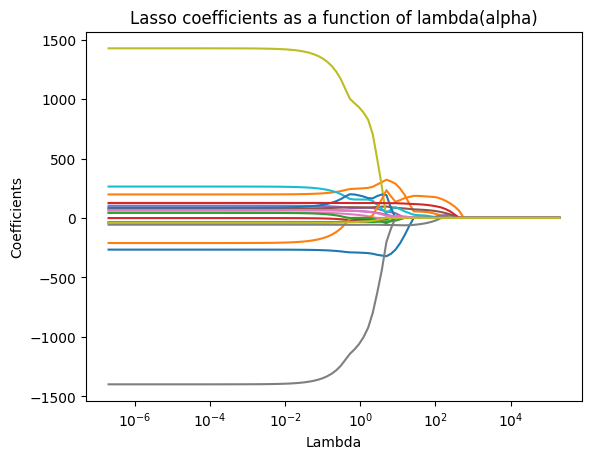

In [72]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log') 
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Coefficients') 
plt.title('Lasso coefficients as a function of lambda(alpha)');
plt.show()

## LassoCV

### LassoCV - cv =10

In [73]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)

In [74]:
lassocv.fit(scaler.fit_transform(X_train), y_train) 

LassoCV(cv=10, max_iter=100000)

In [75]:
lassocv.alpha_

27.50328326187841

## Optimal Lasso

### Optimal Lasso

In [76]:
lasso.set_params(alpha=lassocv.alpha_)

Lasso(alpha=27.50328326187841, max_iter=100000)

In [77]:
lasso.fit(scaler.fit_transform(X_train), y_train)

Lasso(alpha=27.50328326187841, max_iter=100000)

In [78]:
mean_squared_error(y_test, lasso.predict(scaler.fit_transform(X_test)))

106183.71692611946

In [79]:
pd.Series(lasso.coef_, index=X.columns)

AtBat            0.000000
Hits            50.246197
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.794424
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.441152
CRuns            0.000000
CRBI           181.336557
CWalks           0.000000
PutOuts        110.307327
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -44.530872
NewLeague_N      0.000000
dtype: float64

## Coefficient !=0

In [80]:
pd.Series(lasso.coef_[lasso.coef_ !=0], index=X.columns[lasso.coef_ !=0])

Hits           50.246197
Walks          66.794424
CHmRun         19.441152
CRBI          181.336557
PutOuts       110.307327
Division_W    -44.530872
dtype: float64

## Principal Component Analysis 

### Import Libraries

In [81]:
from sklearn.preprocessing import scale

In [82]:
from sklearn.decomposition import PCA

In [83]:
from sklearn.model_selection import KFold, cross_val_score 

In [84]:
from sklearn.linear_model import LinearRegression 

In [85]:
from sklearn.metrics import mean_squared_error 

### Principal Components

In [86]:
pca = PCA()

In [87]:
X_pca_reduced = pca.fit_transform(scale(X))

In [88]:
print(pca.components_.shape)

(19, 19)


In [89]:
pd.DataFrame(pca.components_.T).loc[:4,:4]

,0,1,2,3,4
0,0.198290,-0.383784,0.088626,0.031967,0.028117
1,0.195861,-0.377271,0.074032,0.017982,-0.004652
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299


### Principal Components Variance Explained

In [90]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

### Implement PCA

In [91]:
pca_t = PCA() 

In [92]:
X_train_reduced_pca = pca_t.fit_transform(scale(X_train))

In [93]:
n = len(X_train_reduced_pca)

In [94]:
kfold10 = KFold(n_splits=10)

In [95]:
lm_regr = LinearRegression()

In [96]:
mse = []

In [97]:
tr_score = -1*cross_val_score(lm_regr, np.ones((n,1)),y_train, cv=kfold10, scoring='neg_mean_squared_error').mean()

In [98]:
mse.append(tr_score) 

In [100]:
for i in np.arange(1, 20):
    tr_score = -1*cross_val_score(lm_regr, X_train_reduced_pca[:,:i], y_train, cv=kfold10, scoring='neg_mean_squared_error').mean()
    mse.append(tr_score) 

[]

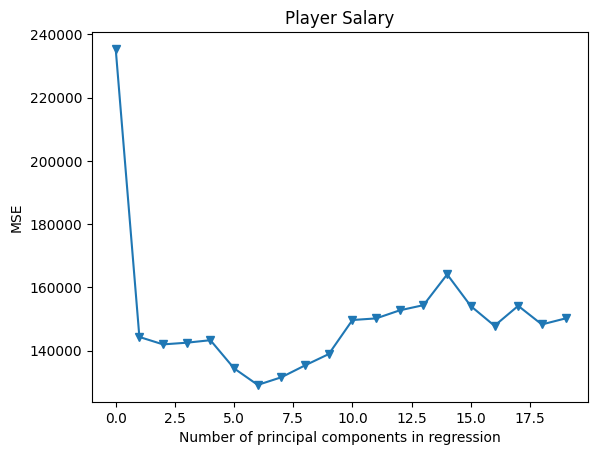

In [103]:
plt.plot(mse, '-v') 
plt.xlabel('Number of principal components in regression') 
plt.ylabel('MSE')
plt.title('Player Salary') 
plt.xlim(xmin=-1); 
plt.plot()

### MSE for Each Component

In [104]:
mse_each_comp=pd.Series(np.array(mse).flatten(), index = np.arange(1,21)) 

In [105]:
mse_each_comp

1     235406.619100
2     144310.329851
3     141961.097915
4     142493.549431
5     143287.577720
6     134376.466736
7     129143.405002
8     131571.376294
9     135335.186049
10    138904.079492
11    149674.333623
12    150179.569822
13    152739.781510
14    154371.214873
15    164099.596798
16    154067.909113
17    147843.866699
18    154154.156968
19    148268.507015
20    150176.362589
dtype: float64

### Minimum MSE

In [106]:
np.amin(mse_each_comp) 

129143.40500200151

## Regression Model with Reduced Components

In [107]:
X_test_reduced_pca = pca_t.transform(scale(X_test))[:,:7] 

In [108]:
regr = LinearRegression()

In [109]:
regr.fit(X_train_reduced_pca[:,:7], y_train)

LinearRegression()

In [110]:
pred = regr.predict(X_test_reduced_pca) 

In [111]:
mean_squared_error(y_test, pred) 

111994.42273636992

In [112]:
regr.coef_ 

array([111.65854316, -31.45724128,  29.39674508, -27.26877462,
       -94.69732568,  96.48700437, -49.67311542])